In [103]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

#Preprocessing
from sklearn.preprocessing import StandardScaler, normalize, OneHotEncoder, LabelEncoder

#ML Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neural_network import MLPClassifier as NN
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.svm import SVC


# Performance Metrics
from sklearn.model_selection import cross_val_score,train_test_split, cross_validate
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix,f1_score




## Loading the Data:

The dataset for this project is found on Kaggle was made to allow data scientists to predict if an adult makes more or less than 50K per year.  The original dataset includes 15 columns including a person’s age to their, educational background and a few other metrics.  Four of these columns are quantitative while the rest are qualitative.  

In [2]:
# Read the dataset
data = pd.read_csv('adult_U.csv')
#data_org = pd.read_csv('adult.csv')
# Remove unnecessary columns and rows with missing values
data = data.drop(['education', 'fnlwgt','relationship'], axis=1)
data = data.dropna() # might want to come back to this later
data.head(10)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,0
7,63,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,3103,0,32,United-States,1
8,24,Private,10,Never-married,Other-service,White,Female,0,0,40,United-States,0
9,55,Private,4,Married-civ-spouse,Craft-repair,White,Male,0,0,10,United-States,0
10,65,Private,9,Married-civ-spouse,Machine-op-inspct,White,Male,6418,0,40,United-States,1
11,36,Federal-gov,13,Married-civ-spouse,Adm-clerical,White,Male,0,0,40,United-States,0


## Preprocessing:
After loading in the data we wanted to take an innital look by plotting a correlation matrix to show if there were any numerical columns that overlap.  The results show that none of the numerical columns are highly correlated.  It also shows that educational number seems to be the most correlated with our target variable, income. Unfortunately, we cannot use this method to check the categorical columns but we explored those after some further preprocessing.

<AxesSubplot:>

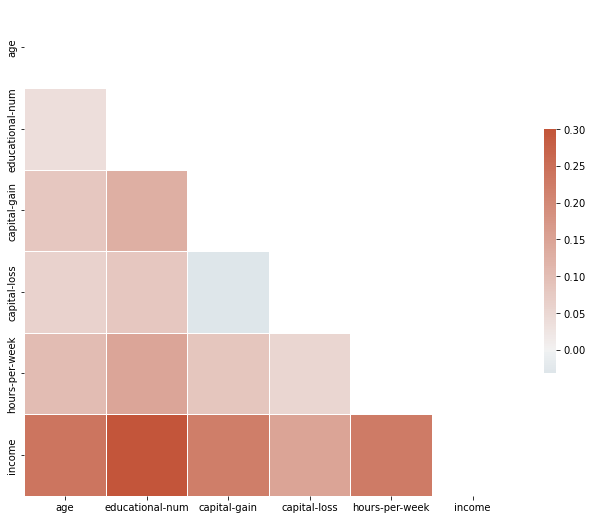

In [3]:
# Make the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
# Recode values in the dataset
data.loc[data['native-country'] == 'Cambodia', 'native-country'] = 'Asia'
data.loc[data['native-country'] == 'China', 'native-country'] = 'Asia'
data.loc[data['native-country'] == "Hong", "native-country"] = "Asia"
data.loc[data['native-country'] == "India", "native-country"] = "Asia"
data.loc[data['native-country'] == "Iran", "native-country"] = "Asia"
data.loc[data['native-country'] == "Japan", "native-country"] = "Asia"
data.loc[data['native-country'] == "Laos", "native-country"] = "Asia"
data.loc[data['native-country'] == "Philippines", "native-country"] = "Asia"
data.loc[data['native-country'] == "Taiwan", "native-country"] = "Asia"
data.loc[data['native-country'] == "Thailand", "native-country"] = "Asia"
data.loc[data['native-country'] == "Vietnam", "native-country"] = "Asia"

data.loc[data['native-country'] == "Hungary", "native-country"] = "Europe"
data.loc[data['native-country'] == "Ireland", "native-country"] = "Europe"
data.loc[data['native-country'] == "Italy", "native-country"] = "Europe"
data.loc[data['native-country'] == "England", "native-country"] = "Europe"
data.loc[data['native-country'] == "France", "native-country"] = "Europe"
data.loc[data['native-country'] == "Germany", "native-country"] = "Europe"
data.loc[data['native-country'] == "Greece", "native-country"] = "Europe"
data.loc[data['native-country'] == "Poland", "native-country"] = "Europe"
data.loc[data['native-country'] == "Portugal", "native-country"] = "Europe"
data.loc[data['native-country'] == "Scotland", "native-country"] = "Europe"
data.loc[data['native-country'] == "South", "native-country"] = "Europe"
data.loc[data['native-country'] == "Yugoslavia", "native-country"] = "Europe"
data.loc[data['native-country'] == "Holand-Netherlands", "native-country"] = "Europe"

data.loc[data['native-country'] == "Honduras", "native-country"] = "North-America"
data.loc[data['native-country'] == "Jamaica", "native-country"] = "North-America"
data.loc[data['native-country'] == "Mexico", "native-country"] = "North-America"
data.loc[data['native-country'] == "Nicaragua", "native-country"] = "North-America"
data.loc[data['native-country'] == "Outlying-US(Guam-USVI-etc)", "native-country"] = "North-America"
data.loc[data['native-country'] == 'Canada', 'native-country'] = 'North-America'
data.loc[data['native-country'] == "Puerto-Rico", "native-country"] = "North-America"
data.loc[data['native-country'] == "Guatemala", "native-country"] = "North-America"
data.loc[data['native-country'] == "Haiti", "native-country"] = "North-America"
data.loc[data['native-country'] == 'Dominican-Republic', 'native-country'] = 'North-America'
data.loc[data['native-country'] == "Trinadad&Tobago", "native-country"] = "North-America"

data.loc[data['native-country'] == "Ecuador", "native-country"] = "South-America"
data.loc[data['native-country'] == "El-Salvador", "native-country"] = "South-America"
data.loc[data['native-country'] == 'Columbia', 'native-country'] = 'South-America'
data.loc[data['native-country'] == 'Cuba', 'native-country'] = 'South-America'
data.loc[data['native-country'] == "Peru", "native-country"] = "South-America"

data.loc[data['native-country'] == "United-States", "native-country"] = "United-States"


#Done hard coded, even though probably could've been done in an easier manner.

In [5]:
# Use the map() and lambda functions to convert the gender data to 1's and 0's
# The lambda function converts 'male' to 1 and 'female' to 0
data['gender'] = data['gender'].map(lambda x: 1 if x == 'Male' else 0)

The two blocks of code above modify the "native-country" and "gender" columns.  For the Native country, we grouped all the countries that are in the same continent except for the United States since 96% of the data was from here. We then modified the gender column to 0 and 1 to help the models run better.

Below we ran One Hot Encoding on the rest of the qualitative columns.  This preprocessing step allows for the models to read the nominal data much more easily since it’s in numerical form. 


In [6]:
categorical_cols = ['workclass', 'marital-status', 'occupation', 'race', "native-country"] 

ohe = OneHotEncoder(handleacc_cv_listwn='ignore',sparse=False)

#One-hot-encode the categorical columns.
array_hot_encoded = ohe.fit_transform(data[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=data.index)

data_hot_encoded.columns = list(ohe.get_feature_names())

#Extract only the columns that didnt need to be encoded
data_other_cols = data.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

# Replace 'col' with 'new' in each column name
data_out.columns = data_out.columns.str.replace('x0_', 'workclass_')
data_out.columns = data_out.columns.str.replace('x1_', 'marital-status_')
data_out.columns = data_out.columns.str.replace('x2_', 'occupation_')
data_out.columns = data_out.columns.str.replace('x3_', 'race_')
data_out.columns = data_out.columns.str.replace('x4_', 'native-country_')

# Print the updated column names
data_out.head(10)

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_North-America,native-country_South-America,native-country_United-States,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,25,7,1,0,0,40,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,38,9,1,0,0,50,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,28,12,1,0,0,40,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,44,10,1,7688,0,40,1
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,34,6,1,0,0,30,0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,63,15,1,3103,0,32,1
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,24,10,0,0,0,40,0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,55,4,1,0,0,10,0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,65,9,1,6418,0,40,1
11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,36,13,1,0,0,40,0


To further preprocess the data, we ran made two copies more copies to make one normalized and one scaled. These preprocessing steps will normally help fix skewness in data but as we found out later, the overall accuracy of the model went down after running this preprocessing step. 

In [120]:
scaler = StandardScaler()


scaled_data = data_out.copy()
normalized_data = data_out.copy()

numeric_columns = ['capital-gain', 'capital-loss']

scaled_data[numeric_columns] = scaler.fit_transform(scaled_data[numeric_columns])
normalized_data[numeric_columns] = normalize(data_out[numeric_columns], norm='l2')



In [121]:
# Select the columns to use in the analysis
X = data_out.drop(['income'], axis=1)

# Select the target variable
Y = data_out['income']

X_norm = normalized_data.drop(['income'], axis=1)

Y_norm = normalized_data['income']

X_scaled = scaled_data.drop(['income'], axis=1)

Y_scaled = scaled_data["income"]




## Exploring the Data:

Now that we have finished preprocessing the data, we want to get a gerneral understanding of what the data looks like. 


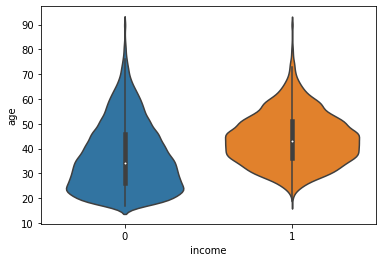

In [123]:
sns.violinplot(data = data_out, x="income", y="age")
plt.savefig('violin_age.png')

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

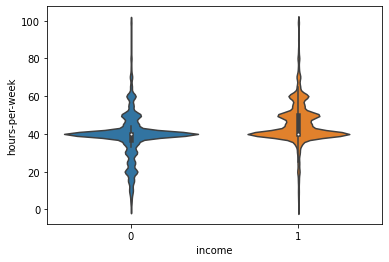

In [10]:
sns.violinplot(data = data_out, x="income", y="hours-per-week")

<AxesSubplot:xlabel='income', ylabel='educational-num'>

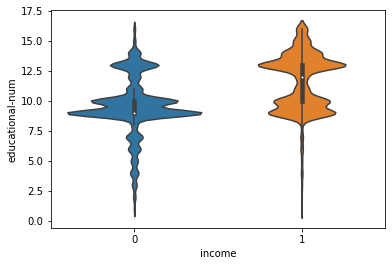

In [11]:
sns.violinplot(data = data_out, x="income", y="educational-num")

<AxesSubplot:>

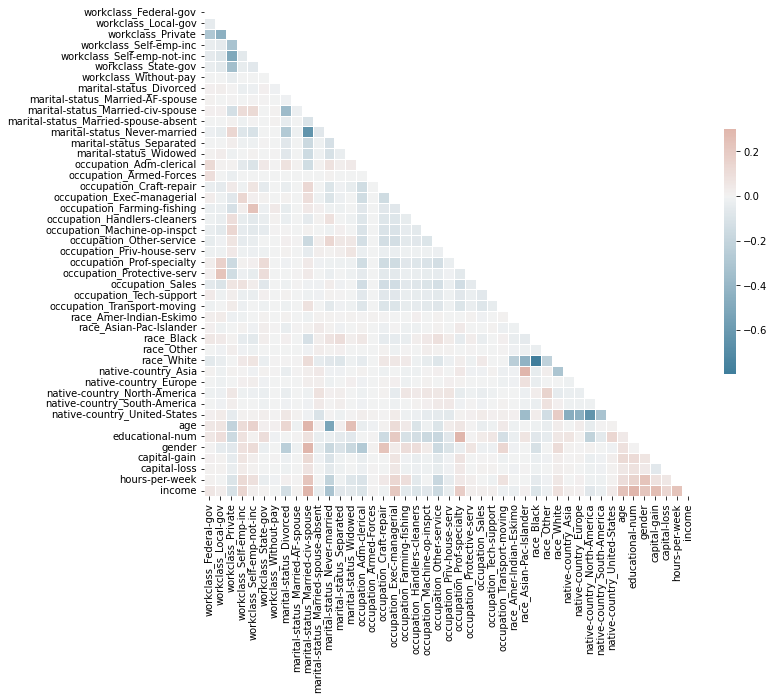

In [12]:
corr = normalized_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
random.seed(42)
#Have decieded to change from last time into .15 instead of .20, could be more interesting
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

## Implementing Models

In [16]:
LR_model = LR(solver = 'newton-cg') 

scores = cross_val_score(LR_model,X,Y,cv=10)
scores_norm = cross_val_score(LR_model,X_norm,Y_norm,cv=10)

print("Average accuracy:", scores.mean())
print("Normalized Average accuracy:", scores_norm.mean())

Average accuracy: 0.8469772511678724
Normalized Average accuracy: 0.8384194333097051


In [92]:
#Creating the machine learning model of Logestic Regression - GLM


#Logisitic Regression Model
LR_model = LR(solver = 'newton-cg') #The Logisitic Regression Classifier


LR_model = LR_model.fit(x_train, y_train) #This was used for the X position for encoded X done above, this is the variable: 'encoded_X'
LR_predicitions = LR_model.predict(x_test)
LR_accuracy = accuracy_score(y_test, LR_predicitions)


print("Logisitical Regression Accuracy: ", LR_accuracy)


Logisitical Regression Accuracy:  0.8468455188679245


In [93]:
lda_model = LDA()

scores = cross_val_score(lda_model,X,Y,cv=10)
print("Average accuracy:", scores.mean())

Average accuracy: 0.8361859229885329


In [111]:
#Creating the machine learning model of Linear Discriminant Analyst  - LDA

# Create an LDA model
lda = LDA()

# Fit the model to the data
lda.fit(x_train, y_train)

# Print the model's performance
lda_accuracy = model.score(x_test, y_test)
print("Linear Discriminant Analysis accuracy:",lda_accuracy)


Linear Discriminant Analysis accuracy: 0.7893573113207547


In [95]:
qda_model = QDA() #The Logisitic Regression Classifier

scores = cross_val_score(qda_model,X,Y,cv=10)
print("Average accuracy:", scores.mean())

Average accuracy: 0.7752653375254474


In [96]:
#Creating the machine learning model of Quadratic Discriminant Analysis - QDA

# Create an instance of the QuadraticDiscriminantAnalysis class
qda = QDA()
# Fit the model using the x_train and y_train data
qda.fit(x_train, y_train)
# Make predictions using the x_test data
qda_predictions = qda.predict(x_test)
# Compute the accuracy of the model on the test data
qda_accuracy = accuracy_score(y_test, qda_predictions)

print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)


Quadratic Discriminant Analysis Accuracy: 0.5452535377358491


In [97]:
nb_model = NB() 

scores = cross_val_score(nb_model,X,Y,cv=10)
print("Average accuracy:", scores.mean())

Average accuracy: 0.8252400551781973


In [98]:

#Creating the machine learning model of Naive Bayes
nb = NB()
# Fit the model using the x_train and y_train data
nb.fit(x_train, y_train)
# Make predictions using the x_test data
nb_predictions = nb.predict(x_test)
# Compute the accuracy of the model on the test data
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Naive Bayes Accuracy:", nb_accuracy)
#nb.__dir__()

Naive Bayes Accuracy: 0.8237028301886793


In [101]:
#Creating the machine learning model of Desicion Tree
dt_clf = DT()
# Fit the model using the x_train and y_train data
dt_clf = dt_clf.fit(x_train, y_train)
# Make predictions using the x_test data
dt_predictions = dt_clf.predict(x_test)
# Compute the accuracy of the model on the test data
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)

dt_df = pd.DataFrame(X.columns,dt_clf.feature_importances_)
dt_df.sort_index()

dt_df

Decision Tree Accuracy: 0.8207547169811321


,0
0.005748,workclass_Federal-gov
0.008866,workclass_Local-gov
0.013402,workclass_Private
0.007451,workclass_Self-emp-inc
0.011748,workclass_Self-emp-not-inc
0.006198,workclass_State-gov
0.000133,workclass_Without-pay
0.003716,marital-status_Divorced
0.000960,marital-status_Married-AF-spouse
0.215903,marital-status_Married-civ-spouse


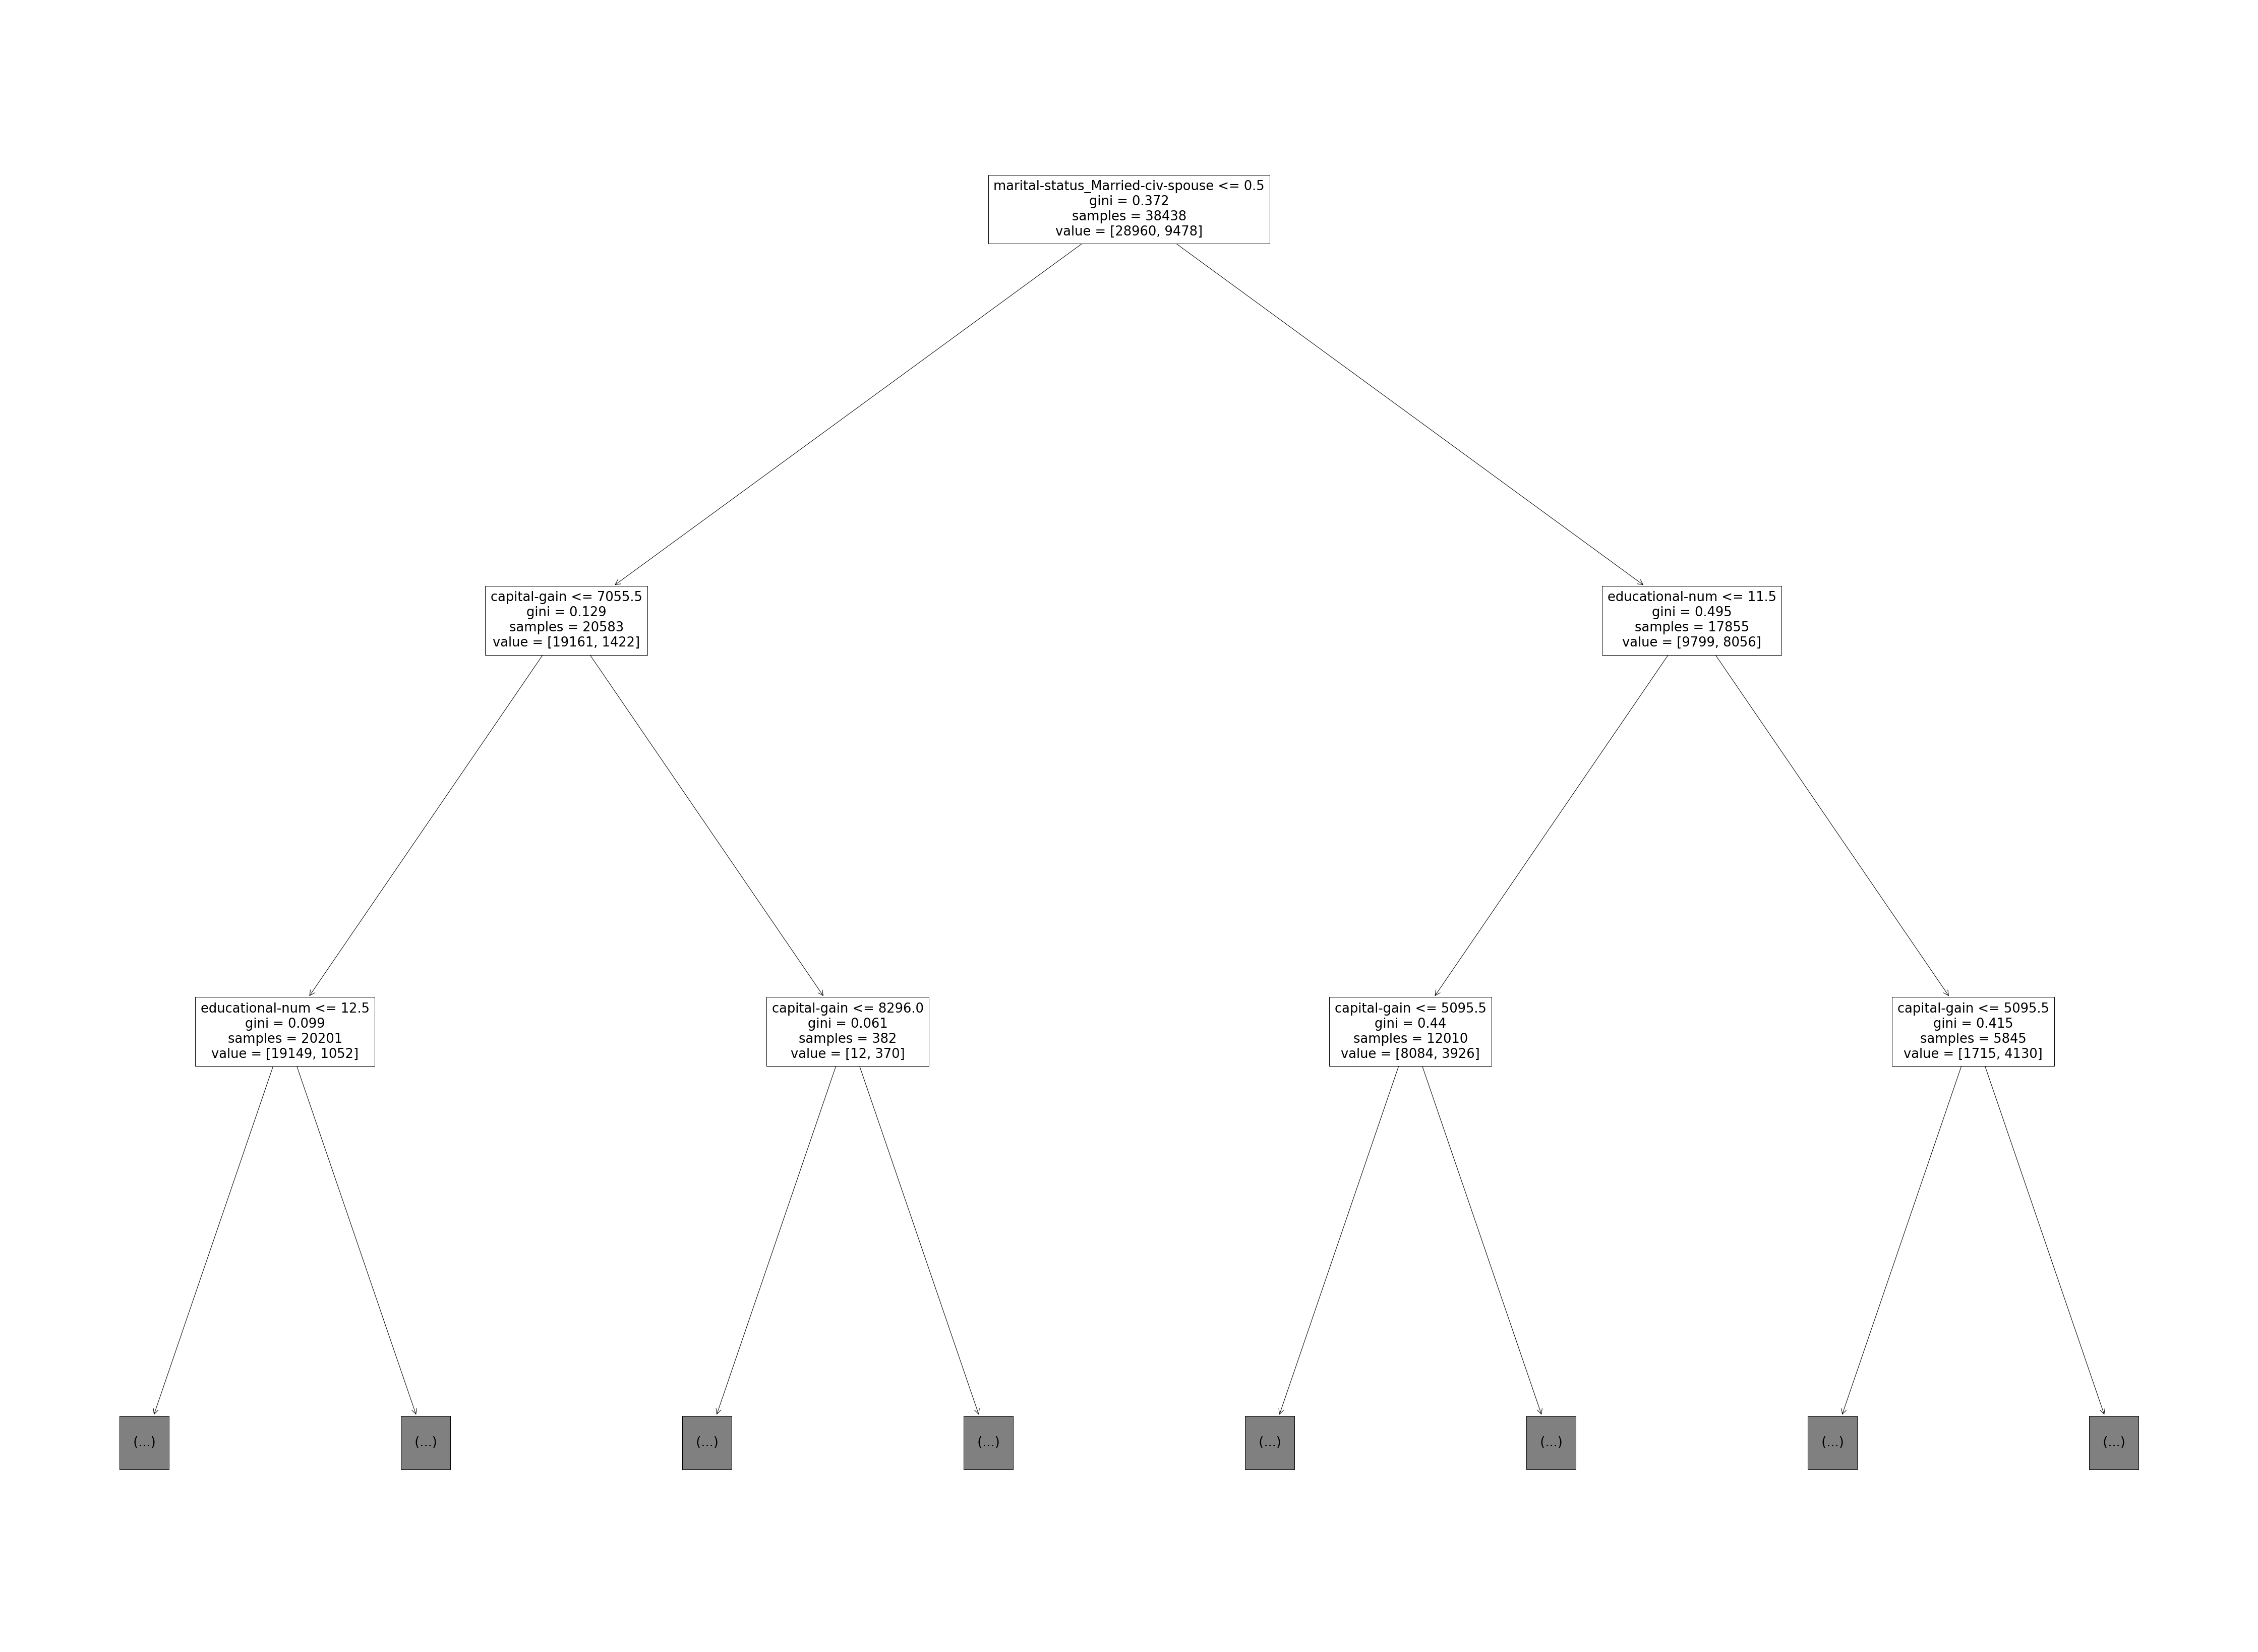

In [105]:
#Decision Tree 
new_column_names = data_out.columns
plt.figure(figsize=(80,60))
plot_tree(dt_clf,feature_names=new_column_names, max_depth = 2)  
plt.show()

In [107]:
#Creating Neural Network - NN, machine of the human brain. ghost in the shell
nn_clf = NN()
# Fit the model using the x_train and y_train data
nn_clf = nn_clf.fit(x_train, y_train)
# Make predictions using the x_test data
nn_predictions = nn_clf.predict(x_test)
# Compute the accuracy of the model on the test data
nn_accuracy = accuracy_score(y_test, nn_predictions)

print("Neural Network Accuracy: ", nn_accuracy)


Neural Network Accuracy:  0.8472877358490566


In [110]:
#Creating k-nearest neighbors - love thy neighbors
knn_clf = KNN(213) # k = 213 Cause the square root of 45222 (data set size) is 212.65 -> 213 rounded up to nearest odd number.
# Fit the model using the x_train and y_train data
knn_clf = knn_clf.fit(x_train, y_train)
# Make predictions using the x_test data
knn_predictions = knn_clf.predict(x_test)
# Compute the accuracy of the model on the test data
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("K-Nearest Neigbors Accuracy: ", knn_accuracy)

K-Nearest Neigbors Accuracy:  0.8297464622641509


List of the models we used: Linear Discriminant Analysis, Quadratic Discriminant Analysis, Logistic Regression, 
Neural Network, Decision Tree Classifier, Random Forest Classifier, K Nearest Neighbors Classifier, Naive Bayes Classifier, Support Vector Machine

In [60]:
#Making a pipeline for the machine learing models

model_list = ["Linear Discriminant Analysis", 
              "Quadratic Discriminant Analysis", 
              "Logistic Regression", 
              "Neural Network", 
              "Decision Tree Classifier", 
              "Random Forest Classifier", 
              "K Nearest Neighbors Classifier", 
              "Naive Bayes Classifier", 
              "Support Vector Machine"]

model_pipeline = [
    LDA(), 
    QDA(),
    LR(solver = 'newton-cg'),
    NN(),
    DT(), 
    RF(),
    KNN(213), # k = 213 Cause the square root of 45222 (data set size) is 212.65 -> 213 rounded up to nearest odd number.
    NB(),
    SVC(probability=True) ]


In [90]:
acc_list = []
f1_list = []
auc_list = []
cmatrix_list = []
roc_list = []



for i, model in enumerate(model_pipeline):
    print(model_list[i])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)
    acc_list.append(accuracy_score(y_test,y_pred))
    fpr, tpr, _thresholds = roc_curve(y_test,y_proba[:,1])
    roc_list.append((fpr,tpr))
    auc_list.append(roc_auc_score(y_test, y_proba[:,1]))
    cmatrix_list.append(confusion_matrix(y_test,y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    
    
        

Linear Discriminant Analysis
Quadratic Discriminant Analysis
Logistic Regression
Neural Network
Decision Tree Classifier
Random Forest Classifier
K Nearest Neighbors Classifier
Naive Bayes Classifier
Support Vector Machine


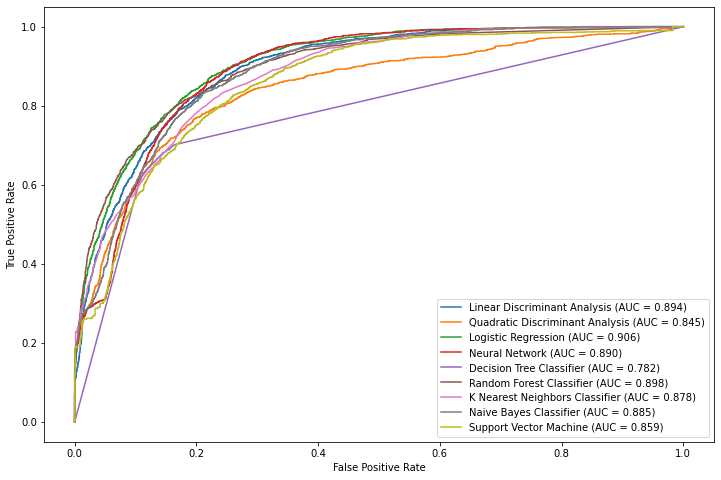

In [71]:
fig = plt.figure(figsize= (12,8))
for i in range(len(roc_list)):
    name = model_list[i]
    auc = auc_list[i]
    plt.plot(roc_list[i][0],roc_list[i][1], label=f"{name} (AUC = {auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

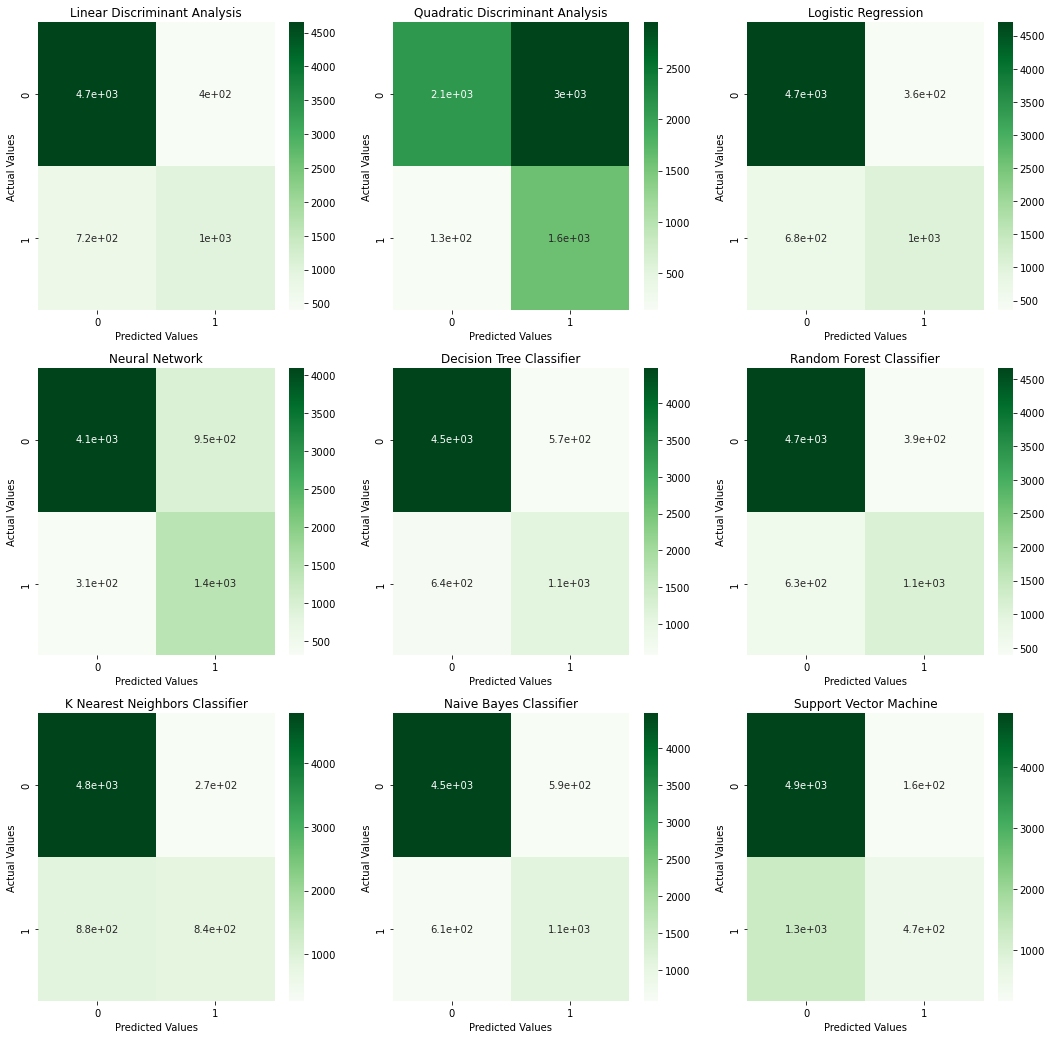

In [74]:
fig = plt.figure(figsize= (18,18))

for i in range(len(cmatrix_list)):
    cm = cmatrix_list[i]
    model = model_list[i]
    sub = fig.add_subplot(3,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm,annot = True, cmap = "Greens")
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")
                 

In [75]:
# This code block takes a long time to run 5:48-6:18 

acc_cv_list = []
f1_cv_list = []
auc_cv_list = []
cmatrix_cv_list = []


for i, model in enumerate(model_pipeline):
    print(model_list[i])
    scores = cross_validate(model, X, Y, cv = 5, scoring=('accuracy', 'f1','roc_auc'))
    acc_cv_list.append(np.mean(scores["test_accuracy"]))
    f1_cv_list.append(np.mean(scores["test_f1"]))
    auc_cv_list.append(np.mean(scores["test_roc_auc"]))
                    

Linear Discriminant Analysis
Quadratic Discriminant Analysis
Logistic Regression
Neural Network
Decision Tree Classifier
Random Forest Classifier
K Nearest Neighbors Classifier
Naive Bayes Classifier
Support Vector Machine


In [122]:
final_df = pd.DataFrame({"Model":model_list, 
                         "Accuracy": acc_list, 
                         "AUC": auc_list, 
                         "F1 Score": f1_list, 
                         "CV Accuracy":acc_cv_list, 
                         "CV AUC": auc_cv_list, 
                         "CV F1 Score": f1_cv_list})
final_df.sort_values("CV AUC", ascending=False)

,Model,Accuracy,AUC,F1 Score,CV Accuracy,CV AUC,CV F1 Score
2,Logistic Regression,0.846846,0.905792,0.668157,0.847066,0.902081,0.659947
3,Neural Network,0.848467,0.895700,0.660726,0.842068,0.893663,0.652534
5,Random Forest Classifier,0.849794,0.898101,0.681861,0.845496,0.892310,0.667718
0,Linear Discriminant Analysis,0.835348,0.893737,0.645059,0.835832,0.890022,0.634557
7,Naive Bayes Classifier,0.823703,0.884735,0.652123,0.825284,0.881685,0.642546
6,K Nearest Neighbors Classifier,0.829746,0.878098,0.594025,0.831719,0.875148,0.583620
8,Support Vector Machine,0.789357,0.858757,0.394748,0.796139,0.855033,0.398613
1,Quadratic Discriminant Analysis,0.545254,0.845042,0.508523,0.758702,0.810776,0.498268
4,Decision Tree Classifier,0.823408,0.782419,0.645772,0.817390,0.774254,0.625088


In [118]:
norm_acc_list = []
norm_f1_list = []
norm_auc_list = []

for i, model in enumerate(model_pipeline[:-1]):
    print(model_list[i])
    scores = cross_validate(model, X_norm, Y_norm, cv = 5, scoring=('accuracy', 'f1','roc_auc'))
    norm_acc_list.append(np.mean(scores["test_accuracy"]))
    norm_f1_list.append(np.mean(scores["test_f1"]))
    norm_auc_list.append(np.mean(scores["test_roc_auc"]))
    
norm_df = pd.DataFrame({"Model":model_list[:-1], 
                        "CV Accuracy":norm_acc_list, 
                        "CV AUC": norm_f1_list, 
                        "CV F1 Score": norm_auc_list})
final_df.sort_values("CV Accuracy", ascending=False)
    


Linear Discriminant Analysis
Quadratic Discriminant Analysis
Logistic Regression
Neural Network
Decision Tree Classifier
Random Forest Classifier
K Nearest Neighbors Classifier
Naive Bayes Classifier


,Model,Accuracy,AUC,F1 Score,CV Accuracy,CV AUC,CV F1 Score
2,Logistic Regression,0.846846,0.905792,0.668157,0.847066,0.902081,0.659947
5,Random Forest Classifier,0.849794,0.898101,0.681861,0.845496,0.892310,0.667718
3,Neural Network,0.848467,0.895700,0.660726,0.842068,0.893663,0.652534
0,Linear Discriminant Analysis,0.835348,0.893737,0.645059,0.835832,0.890022,0.634557
6,K Nearest Neighbors Classifier,0.829746,0.878098,0.594025,0.831719,0.875148,0.583620
7,Naive Bayes Classifier,0.823703,0.884735,0.652123,0.825284,0.881685,0.642546
4,Decision Tree Classifier,0.823408,0.782419,0.645772,0.817390,0.774254,0.625088
8,Support Vector Machine,0.789357,0.858757,0.394748,0.796139,0.855033,0.398613
1,Quadratic Discriminant Analysis,0.545254,0.845042,0.508523,0.758702,0.810776,0.498268


In [119]:
scaled_acc_list = []
scaled_f1_list = []
scaled_auc_list = []

for i, model in enumerate(model_pipeline[:-1]):
    print(model_list[i])
    scores = cross_validate(model, X_scaled, Y_scaled, cv = 5, scoring=('accuracy', 'f1','roc_auc'))
    scaled_acc_list.append(np.mean(scores["test_accuracy"]))
    scaled_f1_list.append(np.mean(scores["test_f1"]))
    scaled_auc_list.append(np.mean(scores["test_roc_auc"]))
    
norm_df = pd.DataFrame({"Model":model_list[:-1], 
                        "CV Accuracy":scaled_acc_list, 
                        "CV AUC": scaled_f1_list, 
                        "CV F1 Score": scaled_auc_list})
final_df.sort_values("CV Accuracy", ascending=False)

Linear Discriminant Analysis
Quadratic Discriminant Analysis
Logistic Regression
Neural Network
Decision Tree Classifier
Random Forest Classifier
K Nearest Neighbors Classifier
Naive Bayes Classifier


,Model,Accuracy,AUC,F1 Score,CV Accuracy,CV AUC,CV F1 Score
2,Logistic Regression,0.846846,0.905792,0.668157,0.847066,0.902081,0.659947
5,Random Forest Classifier,0.849794,0.898101,0.681861,0.845496,0.892310,0.667718
3,Neural Network,0.848467,0.895700,0.660726,0.842068,0.893663,0.652534
0,Linear Discriminant Analysis,0.835348,0.893737,0.645059,0.835832,0.890022,0.634557
6,K Nearest Neighbors Classifier,0.829746,0.878098,0.594025,0.831719,0.875148,0.583620
7,Naive Bayes Classifier,0.823703,0.884735,0.652123,0.825284,0.881685,0.642546
4,Decision Tree Classifier,0.823408,0.782419,0.645772,0.817390,0.774254,0.625088
8,Support Vector Machine,0.789357,0.858757,0.394748,0.796139,0.855033,0.398613
1,Quadratic Discriminant Analysis,0.545254,0.845042,0.508523,0.758702,0.810776,0.498268


In [223]:
#Captial gain and loss, age, hours per week Normalized



print("Logisitical Regression Accuracy: ", glm_accuracy)
print("Linear Discriminant Analysis accuracy:",lda_accuracy)
print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Neural Network Accuracy: ", nn_accuracy)
print("K-Nearest Neigbors Accuracy: ", knn_accuracy)

Logisitical Regression Accuracy:  0.8493514150943396
Linear Discriminant Analysis accuracy: 0.8387382075471698
Quadratic Discriminant Analysis Accuracy: 0.6904481132075472
Naive Bayes Accuracy: 0.7670990566037735
Decision Tree Accuracy: 0.8158903301886793
Neural Network Accuracy:  0.8489091981132075
K-Nearest Neigbors Accuracy:  0.8365271226415094


In [282]:
#Captial gain and loss Normalized



print("Logisitical Regression Accuracy: ", glm_accuracy)
print("Linear Discriminant Analysis accuracy:",lda_accuracy)
print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Neural Network Accuracy: ", nn_accuracy)
print("K-Nearest Neigbors Accuracy: ", knn_accuracy)

Logisitical Regression Accuracy:  0.8419811320754716
Linear Discriminant Analysis accuracy: 0.8285672169811321
Quadratic Discriminant Analysis Accuracy: 0.7460200471698113
Naive Bayes Accuracy: 0.7610554245283019
Decision Tree Accuracy: 0.8163325471698113
Neural Network Accuracy:  0.8492040094339622
K-Nearest Neigbors Accuracy:  0.8055719339622641
